In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

In [95]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [97]:
df = pd.read_csv(file_path) 

In [98]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [99]:
df["peak-rpm"].dtypes

dtype('float64')

In [100]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<Axes: xlabel='stroke', ylabel='price'>

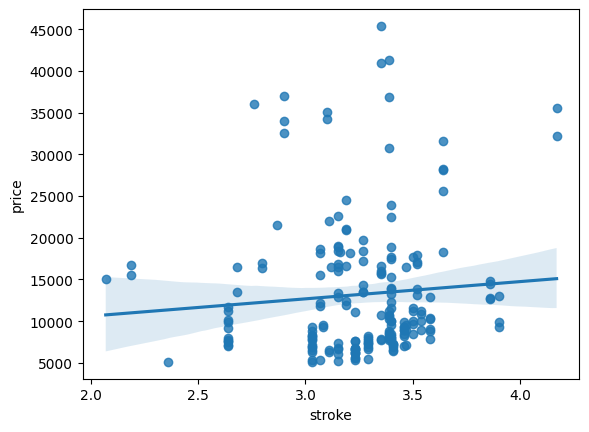

In [101]:
sns.regplot(x = "stroke" , y = "price" , data = df) 

In [102]:
df[["stroke" , "price" ]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


### Basic of Grouping

In [104]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [105]:
df_group_one = df[["drive-wheels","body-style","price"]]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [106]:
df_group_one = df_group_one.groupby(["drive-wheels"], as_index = False).agg({"price"  : "mean" })
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [107]:
df_group_two = df[['drive-wheels','body-style','price']]
df_group_two = df_group_two.groupby(['drive-wheels','body-style'] , as_index = False).mean()


In [108]:
df_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [109]:
df_test = df[["price" , "body-style" ]]
df_test.groupby(["body-style"] , as_index = False).agg({"price":"mean"}) 

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [110]:
df_test.dtypes

price         float64
body-style     object
dtype: object

In [111]:
pearson_coef , p_value = stats.pearsonr(df["wheel-base"] , df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


### Cross Validation

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X = df.drop("price" , axis = 1) 
Y = df["price"]

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X , Y,
                                                 test_size=0.40,
                                                 random_state = 0) 

In [120]:
from sklearn.linear_model import LinearRegression

In [124]:
lm = LinearRegression()

In [134]:
lm.fit(X_train[["horsepower"]],Y_train)

LinearRegression()

In [137]:
lm.score(X_train[["horsepower"]], Y_train) 

0.5754067463583004

In [139]:
lm.score(X_test[["horsepower"]], Y_test) 

0.7139364665406973

In [146]:
from sklearn.model_selection import cross_val_score

In [148]:
Rcoss = cross_val_score(lm , X[["horsepower"]], Y , cv = 4) 